<a href="https://colab.research.google.com/github/apoorvapradip/Deep-Learning-Based-Disease-Detection./blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.image as mpimg

In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import math
from math import floor
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50

In [ ]:
path = r'/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train'
classes = os.listdir(path)

In [ ]:
classes

['acne', 'psoriasis', 'eczema']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 10)

<Figure size 1000x1000 with 0 Axes>

In [ ]:
acne_dir =r'/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train/acne'
eczema_dir = r'/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train/eczema'
psoriasis_dir =r'/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train/psoriasis'

In [ ]:
acne_names = os.listdir(acne_dir)
eczema_names = os.listdir(eczema_dir)
psoriasis_names = os.listdir(psoriasis_dir)

In [ ]:
pic_index = 10

In [ ]:
acne_images = [os.path.join(acne_dir, fname) for fname in acne_names[pic_index-10:pic_index]]
pic_index = 10  # Safe default, change as needed

# Adjust to minimum length available in directories
max_psoriasis = min(len(psoriasis_names), pic_index)
max_eczema = min(len(eczema_names), pic_index)

# Load paths
psoriasis_images = [os.path.join(psoriasis_dir, fname) for fname in psoriasis_names[:max_psoriasis]]
eczema_images = [os.path.join(eczema_dir, fname) for fname in eczema_names[:max_eczema]]

In [ ]:
print(len(acne_names))

10


In [ ]:
print(len(eczema_images))

10


In [ ]:
print(len(psoriasis_images))

9


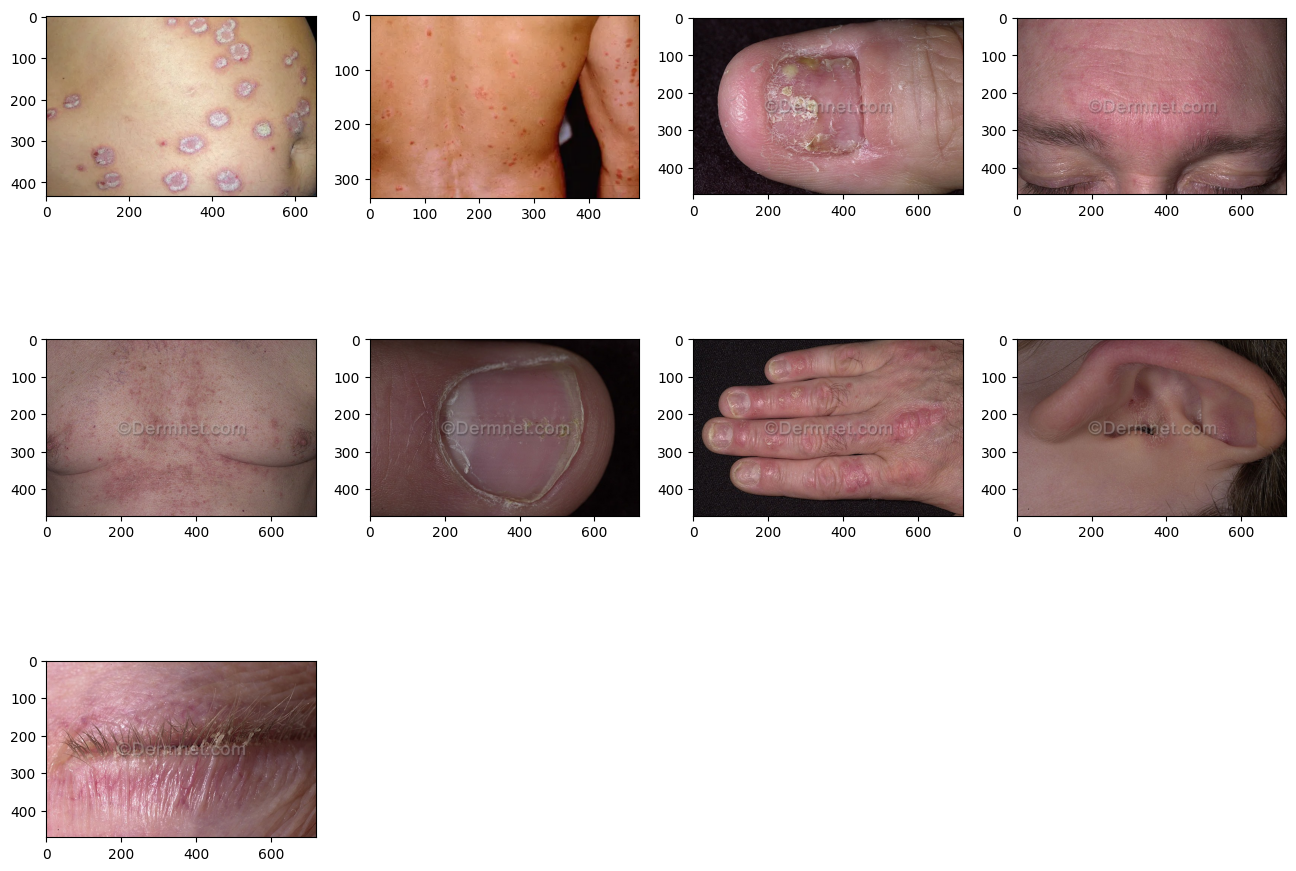

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_path in enumerate(psoriasis_images ):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

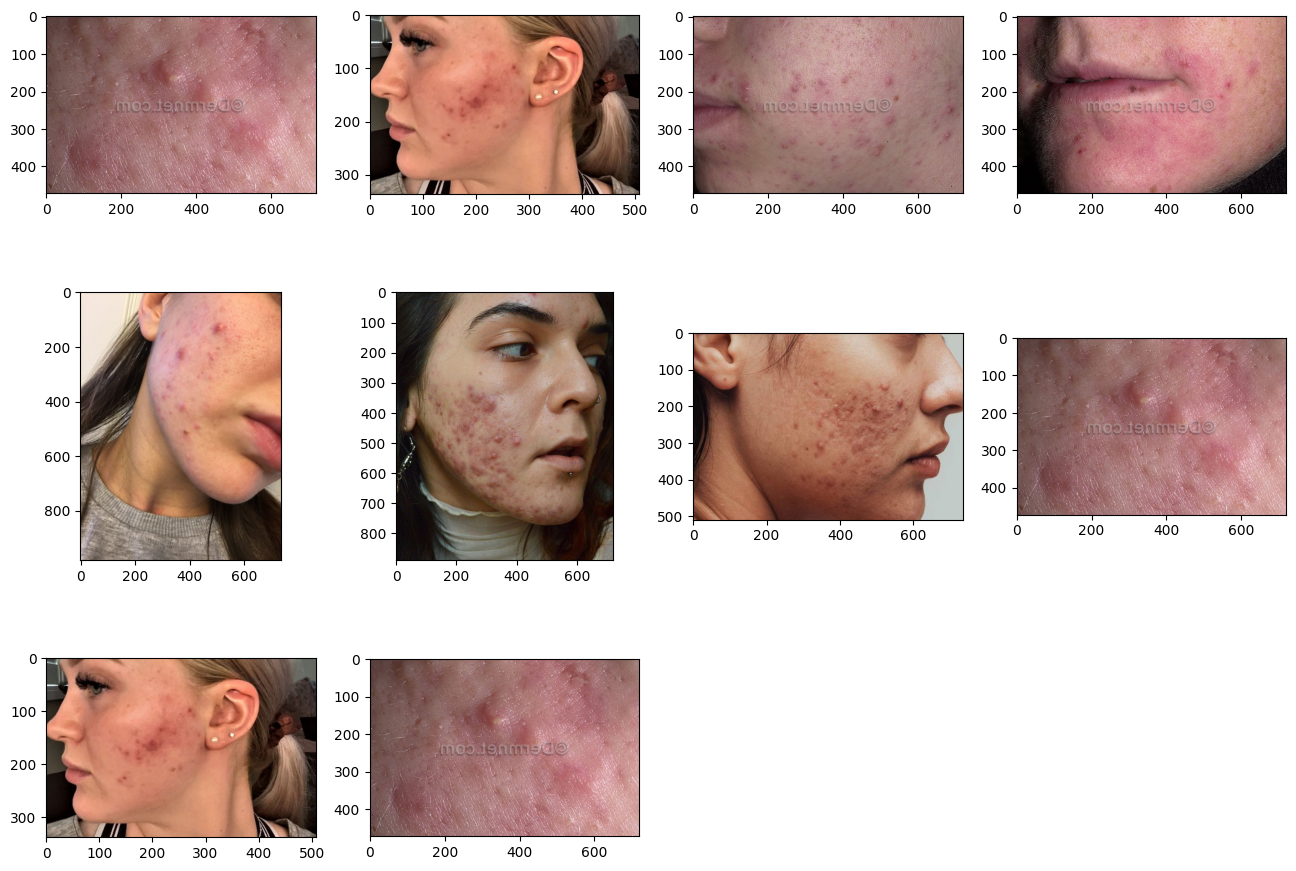

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_name in enumerate(acne_names):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')
  # Join the directory path with the image name to get the full path
  img_path = os.path.join(acne_dir, img_name)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

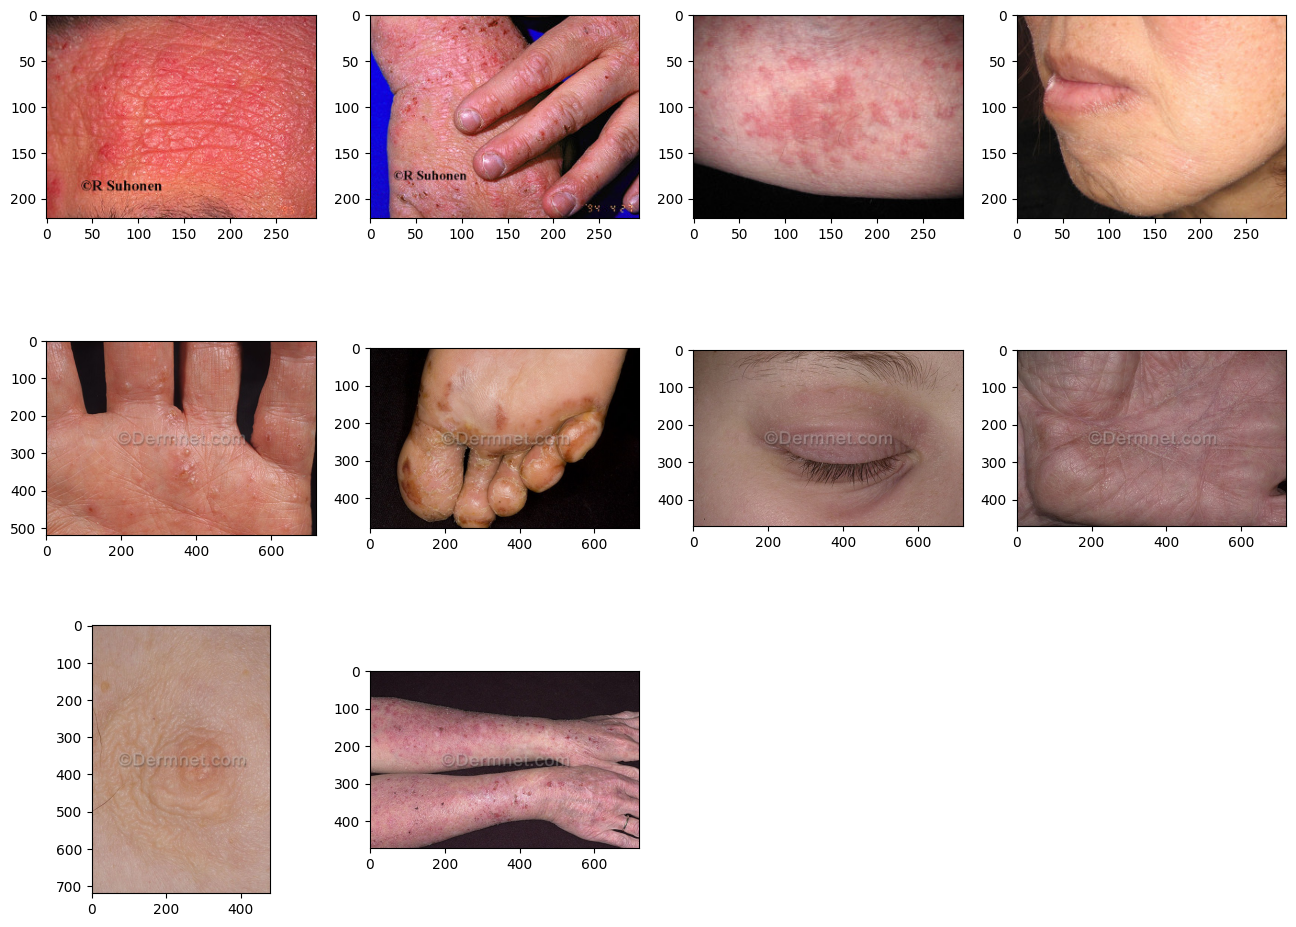

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_name in enumerate(eczema_images):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')
  # Join the directory path with the image name to get the full path
  img_path = os.path.join(eczema_dir, img_name)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import os

base_dir = '/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train'
for root, dirs, files in os.walk(base_dir):
    for name in files:
        print(name)

07AcnePittedScars1.jpg
0_Skin.jpg
Copy of acne2.jpg
Copy of acne1.jpg
Copy of acne.jpg
Copy of a3.jpg
Copy of a1.jpg
Copy of 07AcnePittedScars1.jpg
Copy of 0_Skin.jpg
Copy of 07AcnePittedScars1 (1).jpg
psoriasis1.jpg
psoriasis2.jpg
psoriasis3.jpg
08SebDermBrow.jpg
08SebDermChest020106.jpg
08PsoriasisPitting.jpg
08PsoriasisNailSkin.jpg
08SebDermEar1.jpg
08SebDermEyelashes.jpg
eczema1.jpg
eczema2.jpg
eczema3.jpg
eczema4.jpg
Dyshidrosis-47.jpg
Dyshidrosis-2.jpg
03DermatitisLids1.jpg
eczema-acute-5.jpg
eczema-areola-5.jpg
eczema-arms-4.jpg
eczema-areola-18.jpg


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(len(classes), activation='softmax')(x)  # Adjust for the number of classes

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_78"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,278,851 (187.98 MB)

 Trainable params: 25,691,139 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding = "same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(3, activation="softmax")) # Change the output layer to 3 neurons for 3 classes
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,547 (95.75 MB)

 Trainable params: 25,100,547 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding = "same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(3, activation="softmax")) # Change the output layer to 3 neurons for 3 classes
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,547 (95.75 MB)

 Trainable params: 25,100,547 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No validation_split here
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 30 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.0958 - val_accuracy: 0.4074 - val_loss: 1.0773
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 0.3667 - loss: 1.0731 - val_accuracy: 0.4815 - val_loss: 1.0280
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.5333 - loss: 1.0004 - val_accuracy: 0.5556 - val_loss: 0.9959
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - accuracy: 0.6000 - loss: 0.9752 - val_accuracy: 0.8148 - val_loss: 0.9452
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.8333 - loss: 0.9220 - val_accuracy: 0.6667 - val_loss: 0.9025
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.7000 - loss: 0.8730 - val_accuracy: 0.5926 - val_loss: 0.8743
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 0.6333 - loss: 0.8406 - val_accuracy: 0.6667 - val_loss: 0.8369
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7000 - loss: 0.8009 - val_accuracy: 0.7407 - val_loss: 0.

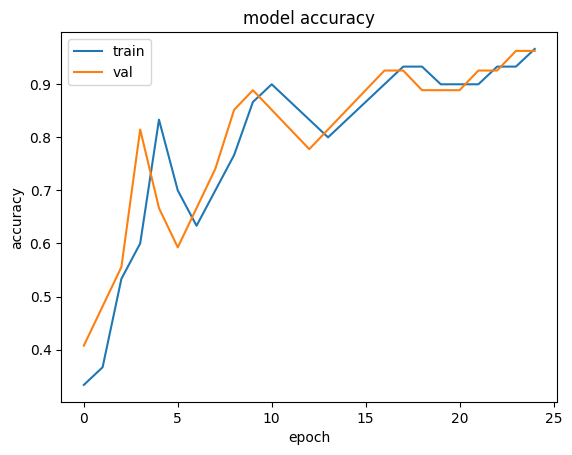

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


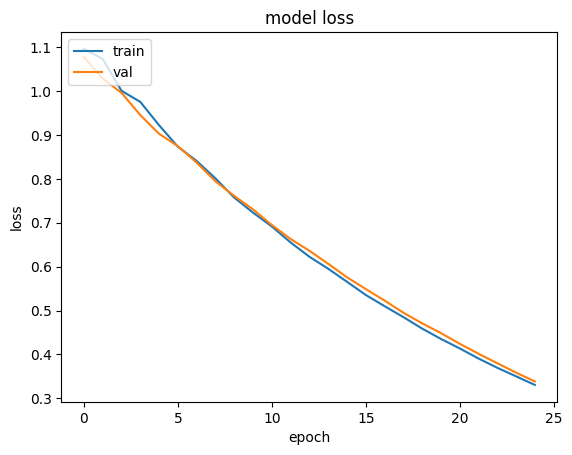

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [ ]:
results = model.evaluate(validation_generator, verbose=0)
##print("Test Loss: {:.4f}".format(results[0]))

print("Test Accuracy: {:.2f}%".format(results[1]*100))


Test Accuracy: 96.30%


In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [ ]:
img_path=r"/content/drive/MyDrive/ResNet model/acne vs eczema vs psoriasis/train/acne/07AcnePittedScars1.jpg"

In [ ]:
img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))


In [ ]:
x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[[100   0   0]]


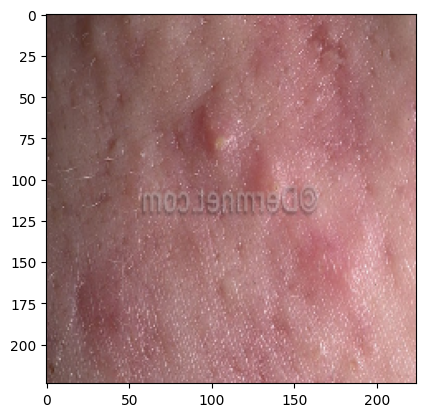

In [ ]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

print((result*100).astype('int'))

plt.imshow(img)



In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)


[np.int64(100), np.int64(0), np.int64(0)]


In [ ]:
print("Largest element is:",max(pp))

Largest element is: 100


In [ ]:
index=pp.index(max(pp))

In [ ]:
name_class=['acne', 'eczema', 'psoriasis']
name_class[index]


'acne'

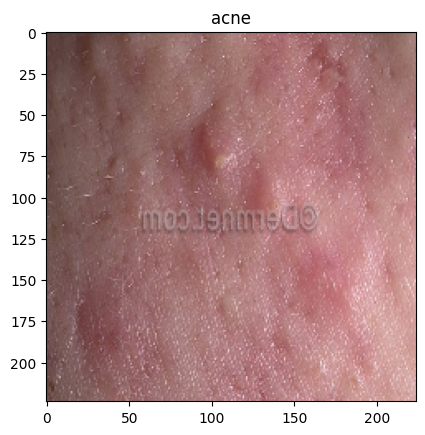

In [ ]:
plt.title(name_class[index])
plt.imshow(img)
